In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os

# Add the 'project' directory to the path
sys.path.append(os.path.abspath('..'))

from project_code.data.preprocess_data import encode_taxonomy, encode_eco_codes, drop_species_with_missing_values, save_types_of_col, split_and_save_dataset

In [3]:
deb_models = ['std', 'stf', 'stx', 'abj']
parameter_cols = ['p_Am', 'kap', 'v', 'p_M', 'E_G', 'h_a', 'E_Hb', 'E_Hj', 'E_Hx', 'E_Hp']
taxonomy_cols = ['family', 'order', 'class', 'phylum']
ecocode_cols = ['climate', 'ecozone', 'habitat', 'embryo', 'migrate', 'food', 'gender', 'reprod']
age_data_cols = ['ab', 'ah', 'aj', 'ax', 'ap', 'am']
time_since_birth_data_cols = ['tg', 'tb', 'tj', 'tx', 'tp']
weight_data_cols = ['Wwb', 'Wwj', 'Wwx', 'Wwp', 'Wwi']
length_data_cols = ['Lb', 'Lj', 'Lx', 'Lp', 'Li']
other_cols = ['d_V', 'Ri', 'T_typical', 't_0', 'model']

In [4]:
def print_missing_values_per_column(df, percentage=True):
    for c in df.columns:
        n_missing = pd.isna(df[c]).sum()
        if n_missing:
            if percentage:
                print(f"{n_missing/len(df)*100:.1f} % missing values in column {c}")
            else:
                print(f"{n_missing} missing values in column {c}")

# Loading raw data

In [5]:
processed_dataset_save_folder = '../data/processed/'

In [6]:
raw_data = pd.read_csv('../data/raw/dataset_matlab.csv', index_col=0)
raw_data.dropna(how='all', inplace=True)
raw_data.index.name = 'species'
raw_data

,p_Am,kap,v,p_M,E_G,h_a,E_Hb,E_Hj,E_Hx,E_Hp,...,Ri,Ni,GSI,NR,d_V,T_typical,f,t_0,model,completeness
species,,,,,,,,,,,,,,,,,,,,,
Abatus_cordatus,41.918449,0.77712,0.027220,13.8449,2393.8237,5.047000e-06,0.487600,6.941000,NaN,1403.000,...,NaN,NaN,0.07,NaN,0.09,278.15,1.0,NaN,abj,2.5
Abbottina_rivularis,75.309251,0.97055,0.020221,23.8370,5215.8135,3.547000e-07,0.045900,0.069550,NaN,89.340,...,7.772727,NaN,NaN,NaN,0.20,291.15,1.0,149.8737,abj,2.5
Ablennes_hians,201.398502,0.99640,0.022797,17.9765,5237.1062,1.614000e-09,0.003540,0.029360,NaN,1083.000,...,179.418014,NaN,NaN,NaN,0.20,301.05,1.0,NaN,abj,2.8
Abra_segmentum,8.266674,0.93000,0.020926,25.2041,2349.9631,7.505000e-07,0.000601,0.011460,NaN,10.940,...,48.959720,NaN,NaN,NaN,0.09,288.15,1.0,NaN,abj,2.1
Abralia_trigonura,109.484284,0.98081,0.009515,1009.8108,5492.3580,1.526000e-10,0.001511,2.628000,NaN,14.090,...,NaN,11000.0,NaN,NaN,0.21,291.15,1.0,NaN,abj,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zosterisessor_ophiocephalus,90.838193,0.97755,0.020245,17.1271,5231.3551,1.513000e-07,0.003958,NaN,NaN,1577.000,...,100.486494,NaN,NaN,NaN,0.20,290.25,1.0,NaN,std,2.5
Zosterops_lateralis,872.827510,0.97558,0.035919,617.3516,7324.4923,2.674000e-12,76.790000,NaN,456.8,1199.000,...,0.067583,NaN,NaN,NaN,0.28,314.75,1.0,NaN,std,2.5
Zosterops_virens,940.612495,0.99060,0.031028,734.2559,7319.8077,3.005000e-12,21.060000,NaN,101.4,294.800,...,0.045055,NaN,NaN,NaN,0.28,314.75,1.0,NaN,std,2.5


In [7]:
raw_data['model'].value_counts()

model
abj    2259
std    2213
stx     732
stf      51
abp      15
ssj      12
hex      11
hep       7
hax       6
asj       4
sbp       4
Name: count, dtype: int64

## Load DEB model predictions 

In [8]:
mat_level_deb_predictions_df = pd.read_csv('../data/deb_model_predictions/metamorphosis_predictions.csv', index_col=0)
mat_level_deb_predictions_df.dropna(how='all', inplace=True)
mat_level_deb_predictions_df.index.name = 'species'
mat_level_deb_predictions_df

,L_b,L_j,L_p,L_i,a_b,a_j,a_p,success,execution_time,error,error_message
species,,,,,,,,,,,
Abatus_cordatus,0.088737,0.213678,1.202151,5.665785,12.717214,39.514929,196.620665,1,0.581737,NaN,NaN
Abbottina_rivularis,0.065971,0.075683,0.783173,3.517721,12.143220,15.500865,274.468552,1,0.581278,NaN,NaN
Ablennes_hians,0.057128,0.115561,3.695223,22.581461,8.437935,16.928854,424.096102,1,0.580210,NaN,NaN
Abra_segmentum,0.014976,0.039564,0.350306,0.805831,3.363052,19.586637,187.816776,1,0.582677,NaN,NaN
Abralia_trigonura,0.021490,0.240470,0.398083,1.189914,7.724631,38.213879,47.267600,1,0.570245,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Zosterisessor_ophiocephalus,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.126701,NaN,NaN
Zosterops_lateralis,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.128840,NaN,NaN
Zosterops_virens,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.130270,NaN,NaN


In [9]:
# Drop species for which an error occurred
mat_level_deb_predictions_df = mat_level_deb_predictions_df[mat_level_deb_predictions_df['error_message'].isna()]
# Drop species for which mat levels were not computed
mat_level_deb_predictions_df['success'] = mat_level_deb_predictions_df['success'].astype('bool')
mat_level_deb_predictions_df = mat_level_deb_predictions_df[mat_level_deb_predictions_df['success']]
mat_level_deb_predictions_df

,L_b,L_j,L_p,L_i,a_b,a_j,a_p,success,execution_time,error,error_message
species,,,,,,,,,,,
Abatus_cordatus,0.088737,0.213678,1.202151,5.665785,12.717214,39.514929,196.620665,True,0.581737,NaN,NaN
Abbottina_rivularis,0.065971,0.075683,0.783173,3.517721,12.143220,15.500865,274.468552,True,0.581278,NaN,NaN
Ablennes_hians,0.057128,0.115561,3.695223,22.581461,8.437935,16.928854,424.096102,True,0.580210,NaN,NaN
Abra_segmentum,0.014976,0.039564,0.350306,0.805831,3.363052,19.586637,187.816776,True,0.582677,NaN,NaN
Abralia_trigonura,0.021490,0.240470,0.398083,1.189914,7.724631,38.213879,47.267600,True,0.570245,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Zingel_asper,0.072276,1.339119,1.339186,4.327728,15.007628,275.414169,275.418626,True,0.132351,NaN,NaN
Zoarces_americanus,0.196003,0.196431,2.265815,9.388288,24.659708,24.724283,377.738521,True,0.137951,NaN,NaN
Zoarces_elongatus,0.100263,0.846983,2.775295,8.840436,19.698527,227.983176,482.359656,True,0.140167,NaN,NaN


In [10]:
print_missing_values_per_column(raw_data)

54.2 % missing values in column E_Hj
67.2 % missing values in column E_Hx
0.2 % missing values in column E_Hp
0.0 % missing values in column climate
0.0 % missing values in column ecozone
0.0 % missing values in column habitat
0.0 % missing values in column embryo
64.8 % missing values in column migrate
0.0 % missing values in column food
0.0 % missing values in column gender
0.0 % missing values in column reprod
44.1 % missing values in column ab
98.3 % missing values in column ah
99.1 % missing values in column aj
100.0 % missing values in column ax
95.6 % missing values in column ap
0.9 % missing values in column am
86.3 % missing values in column tg
99.8 % missing values in column tb
95.8 % missing values in column tj
67.4 % missing values in column tx
49.9 % missing values in column tp
14.5 % missing values in column Wwb
97.8 % missing values in column Wwj
93.7 % missing values in column Wwx
66.1 % missing values in column Wwp
8.3 % missing values in column Wwi
75.8 % missing valu

# Preprocessing

In [11]:
df = raw_data.copy()

## Fill missing data with DEB model predictions

In [12]:
df['s_M'] = mat_level_deb_predictions_df['L_j'] / mat_level_deb_predictions_df['L_b']
df.loc[df['model'].isin(['std', 'stx', 'stf']), 's_M'] = 1
df

,p_Am,kap,v,p_M,E_G,h_a,E_Hb,E_Hj,E_Hx,E_Hp,...,Ni,GSI,NR,d_V,T_typical,f,t_0,model,completeness,s_M
species,,,,,,,,,,,,,,,,,,,,,
Abatus_cordatus,41.918449,0.77712,0.027220,13.8449,2393.8237,5.047000e-06,0.487600,6.941000,NaN,1403.000,...,NaN,0.07,NaN,0.09,278.15,1.0,NaN,abj,2.5,2.408001
Abbottina_rivularis,75.309251,0.97055,0.020221,23.8370,5215.8135,3.547000e-07,0.045900,0.069550,NaN,89.340,...,NaN,NaN,NaN,0.20,291.15,1.0,149.8737,abj,2.5,1.147220
Ablennes_hians,201.398502,0.99640,0.022797,17.9765,5237.1062,1.614000e-09,0.003540,0.029360,NaN,1083.000,...,NaN,NaN,NaN,0.20,301.05,1.0,NaN,abj,2.8,2.022866
Abra_segmentum,8.266674,0.93000,0.020926,25.2041,2349.9631,7.505000e-07,0.000601,0.011460,NaN,10.940,...,NaN,NaN,NaN,0.09,288.15,1.0,NaN,abj,2.1,2.641807
Abralia_trigonura,109.484284,0.98081,0.009515,1009.8108,5492.3580,1.526000e-10,0.001511,2.628000,NaN,14.090,...,11000.0,NaN,NaN,0.21,291.15,1.0,NaN,abj,2.3,11.189711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zosterisessor_ophiocephalus,90.838193,0.97755,0.020245,17.1271,5231.3551,1.513000e-07,0.003958,NaN,NaN,1577.000,...,NaN,NaN,NaN,0.20,290.25,1.0,NaN,std,2.5,1.000000
Zosterops_lateralis,872.827510,0.97558,0.035919,617.3516,7324.4923,2.674000e-12,76.790000,NaN,456.8,1199.000,...,NaN,NaN,NaN,0.28,314.75,1.0,NaN,std,2.5,1.000000
Zosterops_virens,940.612495,0.99060,0.031028,734.2559,7319.8077,3.005000e-12,21.060000,NaN,101.4,294.800,...,NaN,NaN,NaN,0.28,314.75,1.0,NaN,std,2.5,1.000000


## Remove species with invalid data or parameter sets

In [13]:
# Drop rows with values less than 0
df = df[((df.select_dtypes(include='number') >= 0) | (df.select_dtypes(include='number').isna())).all(axis=1)]
# Remove species with incorrect maturity values
df = df[( (df['E_Hb'] < df['E_Hx']) | df[['E_Hb', 'E_Hx']].isna().any(axis=1) )]
df = df[( (df['E_Hb'] < df['E_Hj']) | df[['E_Hb', 'E_Hj']].isna().any(axis=1) )]
df = df[( (df['E_Hb'] < df['E_Hp']) )]
df = df[( (df['E_Hx'] < df['E_Hp']) | df[['E_Hp', 'E_Hx']].isna().any(axis=1) )]
df = df[( (df['E_Hj'] < df['E_Hp']) | df[['E_Hp', 'E_Hj']].isna().any(axis=1) )]
#nwp_df = nwp_df[~(nwp_df['E_Hbjx'] < nwp_df['E_Hb']) & ~(nwp_df['E_Hp'] < nwp_df['E_Hbjx'])]
df

,p_Am,kap,v,p_M,E_G,h_a,E_Hb,E_Hj,E_Hx,E_Hp,...,Ni,GSI,NR,d_V,T_typical,f,t_0,model,completeness,s_M
species,,,,,,,,,,,,,,,,,,,,,
Abatus_cordatus,41.918449,0.77712,0.027220,13.8449,2393.8237,5.047000e-06,0.487600,6.941000,NaN,1403.000,...,NaN,0.07,NaN,0.09,278.15,1.0,NaN,abj,2.5,2.408001
Abbottina_rivularis,75.309251,0.97055,0.020221,23.8370,5215.8135,3.547000e-07,0.045900,0.069550,NaN,89.340,...,NaN,NaN,NaN,0.20,291.15,1.0,149.8737,abj,2.5,1.147220
Ablennes_hians,201.398502,0.99640,0.022797,17.9765,5237.1062,1.614000e-09,0.003540,0.029360,NaN,1083.000,...,NaN,NaN,NaN,0.20,301.05,1.0,NaN,abj,2.8,2.022866
Abra_segmentum,8.266674,0.93000,0.020926,25.2041,2349.9631,7.505000e-07,0.000601,0.011460,NaN,10.940,...,NaN,NaN,NaN,0.09,288.15,1.0,NaN,abj,2.1,2.641807
Abralia_trigonura,109.484284,0.98081,0.009515,1009.8108,5492.3580,1.526000e-10,0.001511,2.628000,NaN,14.090,...,11000.0,NaN,NaN,0.21,291.15,1.0,NaN,abj,2.3,11.189711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zosterisessor_ophiocephalus,90.838193,0.97755,0.020245,17.1271,5231.3551,1.513000e-07,0.003958,NaN,NaN,1577.000,...,NaN,NaN,NaN,0.20,290.25,1.0,NaN,std,2.5,1.000000
Zosterops_lateralis,872.827510,0.97558,0.035919,617.3516,7324.4923,2.674000e-12,76.790000,NaN,456.8,1199.000,...,NaN,NaN,NaN,0.28,314.75,1.0,NaN,std,2.5,1.000000
Zosterops_virens,940.612495,0.99060,0.031028,734.2559,7319.8077,3.005000e-12,21.060000,NaN,101.4,294.800,...,NaN,NaN,NaN,0.28,314.75,1.0,NaN,std,2.5,1.000000


## Fill missing weight data from length data

In [14]:
n_imputed_values = {c: 0 for c in weight_data_cols+age_data_cols+['Ri']}
#species = 'Ziphius_cavirostris'
#for species, row in [[species, df.loc[species]]]:
for species, row in df.iterrows():
    length_vars_exist = [~np.isnan(row[ldv]) for ldv in length_data_cols]
    weight_vars_exist = [~np.isnan(row[wdv]) for wdv in weight_data_cols]
    both_vars_exist = [l and w for l, w in zip(length_vars_exist, weight_vars_exist)]
    # Check if we have a length-weight pair to make correspondences
    if not any(both_vars_exist) or sum(length_vars_exist) <= 1:
        continue
    for i in range(len(length_data_cols) - 1, -1, -1):
        # Continue if the weight at the life stage already exists
        if weight_vars_exist[i]:
            continue
        elif length_vars_exist[i]:
            for j in range(1, len(length_data_cols), 1):
                # Find a life stage with both weight and length data
                b = (i - j) % len(length_data_cols)
                if both_vars_exist[b]:
                    w_col = weight_data_cols[i]
                    df.at[species, w_col] = (row[weight_data_cols[b]] * np.power(row[length_data_cols[i]] / row[length_data_cols[b]], 3))
                    n_imputed_values[w_col] += 1
                    break
                    

## Fill missing weight puberty for Aves species

In [15]:
aves_puberty_weight_factor = 0.95
for species in df.index.values:
    if df.at[species, 'class'] == 'Aves' and pd.isna(df.at[species, 'Wwp']):
        if not pd.isna(df.at[species, 'Wwi']):
            df.at[species, 'Wwp'] = aves_puberty_weight_factor * df.at[species, 'Wwi']
            n_imputed_values['Wwp'] += 1

## Fill missing age data with time since birth data

In [16]:
for species in df.index.values:
    # If no data on age at birth 'ab'
    if pd.isna(df.at[species, 'ab']):
        # Infer it from gestation time 'tg'
        if not pd.isna(df.at[species, 'tg']):
            # If diapause exists take into account for calculating age at birth
            if not pd.isna(df.at[species, 't_0']):
                df.at[species, 'ab'] = df.at[species, 'tg'] + df.at[species, 't_0']
                n_imputed_values['ab'] += 1
            else:
                df.at[species, 'ab'] = df.at[species, 'tg'] 
                n_imputed_values['ab'] += 1

        # Infer from age at hatch 'ah' and time since hatch at birth 'tb'
        elif not pd.isna(df.at[species, 'ah']) and not pd.isna(df.at[species, 'tb']):
            df.at[species, 'ab'] = df.at[species, 'ah'] + df.at[species, 'tb']
            n_imputed_values['ab'] += 1

    # Compute age at maturity levels from time since birth data
    if not pd.isna(df.at[species, 'ab']):
        for mat in ('j', 'x', 'p'):
            if pd.isna(df.at[species, f'a{mat}']) and not pd.isna(df.at[species, f't{mat}']):
                df.at[species, f'a{mat}'] = df.at[species, f't{mat}'] + df.at[species, 'ab']  
                n_imputed_values[f'a{mat}'] += 1



## Fill missing reproduction rate data with total reproduction

In [17]:
for species in df.index.values:
    data = df.loc[species]
    # If no data on reproduction rate 'Ri'
    if pd.isna(df.at[species, 'Ri']):
        # Infer it from total reproduction, maximum age and age at puberty
        if not any(pd.isna(df.loc[species, ['Ni', 'am', 'ap']])):
            df.at[species, 'Ri'] = df.at[species, 'Ni'] / (df.at[species, 'am'] - df.at[species, 'ap'])
            n_imputed_values['Ri'] += 1
        elif not any(pd.isna(df.loc[species, ['NR', 'am', 'ap']])):
            df.at[species, 'Ri'] = df.at[species, 'NR'] / (df.at[species, 'am'] - df.at[species, 'ap'])
            n_imputed_values['Ri'] += 1

## Statistics on imputed values

In [18]:
print(n_imputed_values)

{'Wwb': 557, 'Wwj': 213, 'Wwx': 7, 'Wwp': 2294, 'Wwi': 75, 'ab': 739, 'ah': 0, 'aj': 154, 'ax': 1728, 'ap': 2372, 'am': 0, 'Ri': 37}


Text(0, 0.5, 'Nº Imputed Values')

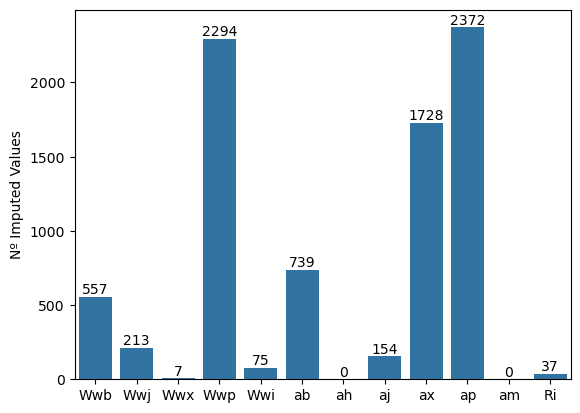

In [19]:
ax = sns.barplot(data=pd.Series(n_imputed_values))
ax.bar_label(ax.containers[0])
ax.set_ylabel('Nº Imputed Values')


In [20]:
# Remove species with data on age at maturity levels not in increasing order
df = df[( (df['ab'] < df['ax']) | df[['ab', 'ax']].isna().any(axis=1) )]
df = df[( (df['ab'] < df['aj']) | df[['ab', 'aj']].isna().any(axis=1) )]
df = df[( (df['ab'] < df['ap']) | df[['ab', 'ap']].isna().any(axis=1) )]
df = df[( (df['ab'] < df['am']) | df[['ab', 'am']].isna().any(axis=1) )]
df = df[( (df['ax'] < df['ap']) | df[['ax', 'ap']].isna().any(axis=1) )]
df = df[( (df['ax'] < df['am']) | df[['ax', 'am']].isna().any(axis=1) )]
df = df[( (df['aj'] < df['ap']) | df[['aj', 'ap']].isna().any(axis=1) )]
df = df[( (df['aj'] < df['am']) | df[['aj', 'am']].isna().any(axis=1) )]
df = df[( (df['ap'] < df['am']) | df[['ap', 'am']].isna().any(axis=1) )]

## Handling acceleration and weaning

In [21]:
df['metamorphosis'] = df['model'] == 'abj'
df['weaning'] = df['model'] == 'stx'
df['foetus'] = (df['model'] == 'stf') | (df['model'] == 'stx')
#df.drop(columns=['model'], inplace=True)

## Handle taxonomic info

In [22]:
# Create genus taxon from species name
df['genus'] = df.index.map(lambda s: s.split('_')[0])

## Save dataset after imputation

In [23]:
df.to_csv('../data/interim/filled_data.csv', index=True)
df

,p_Am,kap,v,p_M,E_G,h_a,E_Hb,E_Hj,E_Hx,E_Hp,...,T_typical,f,t_0,model,completeness,s_M,metamorphosis,weaning,foetus,genus
species,,,,,,,,,,,,,,,,,,,,,
Abatus_cordatus,41.918449,0.77712,0.027220,13.8449,2393.8237,5.047000e-06,0.487600,6.941000,NaN,1403.000,...,278.15,1.0,NaN,abj,2.5,2.408001,True,False,False,Abatus
Abbottina_rivularis,75.309251,0.97055,0.020221,23.8370,5215.8135,3.547000e-07,0.045900,0.069550,NaN,89.340,...,291.15,1.0,149.8737,abj,2.5,1.147220,True,False,False,Abbottina
Ablennes_hians,201.398502,0.99640,0.022797,17.9765,5237.1062,1.614000e-09,0.003540,0.029360,NaN,1083.000,...,301.05,1.0,NaN,abj,2.8,2.022866,True,False,False,Ablennes
Abra_segmentum,8.266674,0.93000,0.020926,25.2041,2349.9631,7.505000e-07,0.000601,0.011460,NaN,10.940,...,288.15,1.0,NaN,abj,2.1,2.641807,True,False,False,Abra
Abralia_trigonura,109.484284,0.98081,0.009515,1009.8108,5492.3580,1.526000e-10,0.001511,2.628000,NaN,14.090,...,291.15,1.0,NaN,abj,2.3,11.189711,True,False,False,Abralia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zosterisessor_ophiocephalus,90.838193,0.97755,0.020245,17.1271,5231.3551,1.513000e-07,0.003958,NaN,NaN,1577.000,...,290.25,1.0,NaN,std,2.5,1.000000,False,False,False,Zosterisessor
Zosterops_lateralis,872.827510,0.97558,0.035919,617.3516,7324.4923,2.674000e-12,76.790000,NaN,456.8,1199.000,...,314.75,1.0,NaN,std,2.5,1.000000,False,False,False,Zosterops
Zosterops_virens,940.612495,0.99060,0.031028,734.2559,7319.8077,3.005000e-12,21.060000,NaN,101.4,294.800,...,314.75,1.0,NaN,std,2.5,1.000000,False,False,False,Zosterops


# Processed dataset

## Define options

In [24]:
taxonomy_class_options = {
    'class': ['Aves', 'Actinopterygii', 'Reptilia', 'Chondrichthyes', 'Amphibia',
       'Mammalia', 'Bivalvia', 'Branchiopoda', 'Malacostraca'],
}
taxonomy_include_other = {
    'class': True
}



In [25]:
eco_code_options = {
    'climate': ['A', 'B', 'C', 'D', 'E'],
    'habitat': ['T', 'F', 'S', 'M'],
    'migrate': ['T'],
    'food': ['P', 'O', 'H', 'C'],
}
eco_code_include_other = {
    'climate': False,
    'habitat': False,
    'migrate': False,
    'food': True,
}


## No age at puberty

In [47]:
nap_df_cols = [
    'ab', 'am', 'd_V', 'Wwb', 'Wwp', 'Wwi', 'Ri',
    'T_typical', 'metamorphosis',
    'p_Am', 'kap', 'v', 'p_M', 'E_Hb', 'E_Hp', 'k_J', 's_M',
    'E_Hj', 'E_Hbj',
    ]

# Include metamorphosis datasets
include_metamorphosis_data = False
if include_metamorphosis_data:
    nap_df_cols.extend(['aj', 'Wwj'])
    
# Include weaning datasets
include_weaning_data = False
if include_weaning_data:
    nap_df_cols.extend(['ax', 'Wwx'])
    
# Include taxonomy columns
include_taxonomy = True
if include_taxonomy:
    nap_df_cols.extend(taxonomy_cols)
# Include eco-code columns
include_eco_codes = True
if include_eco_codes:
    nap_df_cols.extend(ecocode_cols)

# Copy columns
nap_df = pd.DataFrame(index=df.index, columns=nap_df_cols)
nap_df.index.name = 'species'
for col in nap_df_cols:
    if col in df.columns:
        nap_df[col] = df[col].copy()

# Drop species with 'stf' model (too few samples to train model)
nap_df = nap_df[df['model'].isin(['std', 'stx', 'abj'])]
#nap_df.drop(columns=['foetus'], inplace=True)

# Encode taxonomy
if include_taxonomy:
    nap_df, taxonomy_dummy_cols = encode_taxonomy(nap_df, categories=taxonomy_class_options, include_other_col=taxonomy_include_other)
    nap_df.drop(columns=taxonomy_cols, inplace=True)

# Encode eco-codes
if include_eco_codes:
    nap_df, eco_code_dummy_cols = encode_eco_codes(nap_df, categories=eco_code_options, include_other_col=eco_code_include_other)
    nap_df.drop(columns=ecocode_cols, inplace=True)

# Create a single intermediate maturity level (metamorphosis or birth if missing)
nap_df[f"E_Hbj"] = nap_df[f"E_Hbj"].fillna(nap_df.loc[nap_df['metamorphosis'], f'E_Hj'])
nap_df[f"E_Hbj"] = nap_df[f"E_Hbj"].fillna(nap_df.loc[~nap_df['metamorphosis'], f'E_Hb'])
nap_df.drop(columns=[f"E_Hj"], inplace=True)

# Drop rows with missing data
nap_df.dropna(how='any', axis=0, inplace=True)
#nap_df = drop_species_with_missing_values(nap_df)

nap_df

C:\Users\diogo\AppData\Local\Temp\ipykernel_3292\4164271590.py:49: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  nap_df[f"E_Hbj"] = nap_df[f"E_Hbj"].fillna(nap_df.loc[nap_df['metamorphosis'], f'E_Hj'])


,ab,am,d_V,Wwb,Wwp,Wwi,Ri,T_typical,metamorphosis,p_Am,...,habitat_T,habitat_F,habitat_S,habitat_M,migrate_T,food_other,food_P,food_O,food_H,food_C
species,,,,,,,,,,,,,,,,,,,,,
Abbottina_rivularis,18.092767,1761.029277,0.20,0.000520,0.870,79.0,7.772727,291.15,True,75.309251,...,False,True,False,False,False,False,False,False,False,True
Ablennes_hians,1.954569,2675.316655,0.20,0.000520,144.000,4200.0,179.418014,301.05,True,201.398502,...,False,False,False,True,False,False,False,False,False,True
Abramis_brama,15.680398,6603.859788,0.20,0.002800,319.000,6050.0,2271.398921,291.15,True,401.092069,...,False,True,False,False,False,False,False,False,True,True
Abroscopus_superciliaris,2.245595,443.899620,0.28,0.780000,6.175,6.5,0.072088,314.75,False,663.006069,...,True,False,False,False,False,False,False,False,False,True
Acanthis_flammea,2.041450,541.557536,0.28,1.300000,13.490,14.2,0.225276,314.75,False,1294.709603,...,True,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zonotrichia_querula,2.653885,519.362555,0.28,3.100000,32.015,33.7,0.090110,314.75,False,1476.816557,...,True,False,False,False,False,False,False,False,True,True
Zootoca_vivipara,38.066843,4600.151458,0.30,0.190000,2.200,5.0,0.018635,286.85,False,516.242968,...,True,False,False,False,False,False,False,False,False,True
Zosterisessor_ophiocephalus,8.588355,2910.838943,0.20,0.000065,20.760,276.5,100.486494,290.25,False,90.838193,...,False,False,False,True,False,False,False,False,False,True


In [48]:
dataset_name = 'no_pub_age'
types_of_col = {
 'ab': ['input', 'log', 'scale', 'quantile'],
 'am': ['input', 'log', 'scale', 'quantile'],
 'd_V': ['input'],
 'Wwb': ['input', 'log', 'scale', 'quantile'],
 'Wwp': ['input', 'log', 'scale', 'quantile'],
 'Wwi': ['input', 'log', 'scale', 'quantile'],
 'Ri': ['input', 'log', 'scale', 'quantile'],
 'T_typical': ['input', 'scale', 'quantile'],
 'metamorphosis': ['input', 'boolean'],
 'p_Am': ['output', 'log', 'scale', 'quantile'],
 'kap': ['output', 'log', 'scale', 'bounded01', 'quantile'],
 'v': ['output', 'log', 'scale', 'quantile'],
 'p_M': ['output', 'log', 'scale', 'quantile'],
 'E_Hb': ['output', 'log', 'scale', 'quantile'],
 'E_Hbj': ['output', 'log', 'scale', 'quantile'],
 'E_Hp': ['output', 'log', 'scale', 'quantile'],
 'k_J': ['output', 'log', 'scale', 'quantile'],
 's_M': ['output', 'log', 'scale', 'quantile'],
}

if include_taxonomy:
    dataset_name += '_taxonomy'
    for col in taxonomy_dummy_cols:
        types_of_col[col] = ['input', 'boolean']
#else:
#    nap_df.drop(columns=taxonomy_dummy_cols, inplace=True)

if include_eco_codes:
    dataset_name += '_ecocodes'
    for col in eco_code_dummy_cols:
        types_of_col[col] = ['input', 'boolean']
#else:
#    nap_df.drop(columns=eco_code_dummy_cols, inplace=True)

    
split_and_save_dataset(df=nap_df, dataset_name=dataset_name, types_of_col=types_of_col, stratify=df['metamorphosis'], save_folder=processed_dataset_save_folder)


Train set size: 1586
Validation set size: 340
Test set size: 340


In [50]:
df.loc[nap_df.index, :].to_csv(f'{processed_dataset_save_folder}/no_pub_age_taxonomy_ecocodes/no_dummies.csv', index=True, float_format='%.6e')

## Final dataset (no pub age subset)

Predicts  $1-\kappa$, $s_H = E_H^b/E_H^p $ and $s_p = \dot{k}_J E_H^p [\dot{p}_M]^2 / \kappa^2 (1-\kappa) \{ \dot{p}_{Am} \}^3$, as well as $\{ \dot{p}_{Am} \}$, $\dot{v}$, $E_H^p$, $\dot{k}_J$ and $\ddot{h}_a$. $[E_G]$ is predicted from a theoretical equation in the bijection.



In [51]:
final_df_cols = [
    'ab', 'am', 'd_V', 'Wwb', 'Wwp', 'Wwi', 'Ri',
    'T_typical', 'metamorphosis',
    'p_Am', '1-kap', 'v', 's_p_M', 's_Hb_bj', 's_Hbj_p', 'E_Hp', 'k_J', '1/s_M',
    'kap', 'E_Hb', 'E_Hbj', 'p_M', 's_M'
    ]

# Include taxonomy columns
include_taxonomy = True
if include_taxonomy:
    final_df_cols.extend(taxonomy_dummy_cols)

# Include eco-code columns
include_eco_codes = True
if include_eco_codes:
    final_df_cols.extend(eco_code_dummy_cols)

final_df = pd.DataFrame(index=nap_df.index, columns=final_df_cols)

# Copy columns
for col in final_df.columns:
    if col in df.columns:
        final_df[col] = df.loc[final_df.index, col].copy()
    elif col in nap_df.columns:
        final_df[col] = nap_df.loc[final_df.index, col].copy()
    
# Compute ratio columns
final_df['1-kap'] = 1 - final_df['kap']
final_df['1/s_M'] = 1 / final_df['s_M']
final_df['s_Hb_bj'] = final_df['E_Hb'] / final_df['E_Hbj'] 
final_df['s_Hbj_p'] = final_df['E_Hbj'] / final_df['E_Hp']
final_df['s_p_M'] = final_df['k_J'] * final_df['E_Hp'] * final_df['p_M'] ** 2 / final_df['p_Am'] ** 3 / final_df['kap'] ** 2 / (1 - final_df['kap']) / final_df['s_M'] ** 3
final_df.drop(columns=['kap', 'E_Hb', 'E_Hbj', 'p_M', 's_M'], inplace=True)
final_df.columns

Index(['ab', 'am', 'd_V', 'Wwb', 'Wwp', 'Wwi', 'Ri', 'T_typical',
       'metamorphosis', 'p_Am', '1-kap', 'v', 's_p_M', 's_Hb_bj', 's_Hbj_p',
       'E_Hp', 'k_J', '1/s_M', 'class_other', 'class_Aves',
       'class_Actinopterygii', 'class_Reptilia', 'class_Chondrichthyes',
       'class_Amphibia', 'class_Mammalia', 'class_Bivalvia',
       'class_Branchiopoda', 'class_Malacostraca', 'climate_A', 'climate_B',
       'climate_C', 'climate_D', 'climate_E', 'habitat_T', 'habitat_F',
       'habitat_S', 'habitat_M', 'migrate_T', 'food_other', 'food_P', 'food_O',
       'food_H', 'food_C'],
      dtype='object')

In [53]:
dataset_name = 'final'
types_of_col = {
 'ab': ['input', 'log', 'scale', 'quantile'],
 'am': ['input', 'log', 'scale', 'quantile'],
 'd_V': ['input'],
 'Wwb': ['input', 'log', 'scale', 'quantile'],
 'Wwp': ['input', 'log', 'scale', 'quantile'],
 'Wwi': ['input', 'log', 'scale', 'quantile'],
 'Ri': ['input', 'log', 'scale', 'quantile'],
 'T_typical': ['input', 'scale', 'quantile'],
 'metamorphosis': ['input', 'boolean'],
 'p_Am': ['output', 'log', 'scale', 'quantile'],
 '1-kap': ['output', 'log', 'scale', 'bounded01', 'quantile'],
 'v': ['output', 'log', 'scale', 'quantile'],
 's_p_M': ['output', 'log', 'scale', 'bounded01', 'quantile'],
 's_Hb_bj': ['output', 'log', 'scale', 'bounded01', 'quantile'],
 's_Hbj_p': ['output', 'log', 'scale', 'bounded01', 'quantile'],
 'E_Hp': ['output', 'log', 'scale', 'quantile'],
 'k_J': ['output', 'log', 'scale', 'quantile'],
 '1/s_M': ['output', 'log', 'scale', 'bounded01', 'quantile'],
}

if include_taxonomy:
    dataset_name += '_taxonomy'
    for col in taxonomy_dummy_cols:
        types_of_col[col] = ['input', 'boolean']

if include_eco_codes:
    dataset_name += '_ecocodes'
    for col in eco_code_dummy_cols:
        types_of_col[col] = ['input', 'boolean']


split_and_save_dataset(df=final_df, dataset_name=dataset_name, types_of_col=types_of_col, stratify=df['metamorphosis'], save_folder=processed_dataset_save_folder)


Train set size: 1586
Validation set size: 340
Test set size: 340


## Biologist approach (Taxonomy & Maximum weight)

## Biologist approach (Taxonomy & Maximum weight) (Only species in no_pub_age)

In [66]:
bio_nap_df_cols = [
    'Wwi',
    'genus', 'family', 'order', 'class', 'phylum',
    'metamorphosis',
    'p_Am', 'kap', 'v', 'p_M', 'E_G', 'E_Hb', 'E_Hx', 'E_Hj', 'E_Hp', 'k_J', 's_M',
]

bio_nap_df = pd.DataFrame(index=nap_df.index, columns=bio_nap_df_cols)
bio_nap_df.index.name = 'species'
for col in bio_nap_df_cols:
    if col in df.columns:
        bio_nap_df[col] = df[col].copy()
# Fill in E_Hx and E_Hj values for species that do not define them
bio_nap_df['E_Hx'] = bio_nap_df['E_Hx'].fillna(bio_nap_df['E_Hb'])
bio_nap_df['E_Hj'] = bio_nap_df['E_Hj'].fillna(bio_nap_df['E_Hb'])

bio_nap_df.dropna(how='any', inplace=True)
bio_nap_df

,Wwi,genus,family,order,class,phylum,metamorphosis,p_Am,kap,v,p_M,E_G,E_Hb,E_Hx,E_Hj,E_Hp,k_J,s_M
species,,,,,,,,,,,,,,,,,,
Abbottina_rivularis,79.0,Abbottina,Leuciscidae,Cypriniformes,Actinopterygii,Chordata,True,75.309251,0.97055,0.020221,23.8370,5215.8135,0.045900,0.045900,0.069550,89.34,0.002000,1.147220
Ablennes_hians,4200.0,Ablennes,Belonidae,Beloniformes,Actinopterygii,Chordata,True,201.398502,0.99640,0.022797,17.9765,5237.1062,0.003540,0.003540,0.029360,1083.00,0.002000,2.022866
Abramis_brama,6050.0,Abramis,Leuciscidae,Cypriniformes,Actinopterygii,Chordata,True,401.092069,0.66367,0.016416,23.3484,5228.9640,0.548400,0.548400,0.548500,236600.00,0.001245,1.000060
Abroscopus_superciliaris,6.5,Abroscopus,Cisticolidae,Passeriformes,Aves,Chordata,False,663.006069,0.95822,0.034790,533.0640,7316.5423,96.030000,631.400000,96.030000,1472.00,0.021838,1.000000
Acanthis_flammea,14.2,Acanthis,Fringillidae,Passeriformes,Aves,Chordata,False,1294.709603,0.92908,0.037653,907.6351,7320.7246,211.900000,1348.000000,211.900000,3305.00,0.037090,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zonotrichia_querula,33.7,Zonotrichia,Passerellidae,Passeriformes,Aves,Chordata,False,1476.816557,0.97417,0.041453,834.8830,7333.1130,188.800000,817.400000,188.800000,2151.00,0.033836,1.000000
Zootoca_vivipara,5.0,Zootoca,Lacertidae,Squamata,Reptilia,Chordata,False,516.242968,0.72515,0.023765,344.4866,7837.0592,226.400000,226.400000,226.400000,6375.00,0.001997,1.000000
Zosterisessor_ophiocephalus,276.5,Zosterisessor,Gobiidae,Gobiiformes,Actinopterygii,Chordata,False,90.838193,0.97755,0.020245,17.1271,5231.3551,0.003958,0.003958,0.003958,1577.00,0.002000,1.000000


In [67]:
dataset_name = 'biologist_no_pub_age'
types_of_col = {
 'Wwi': ['input', 'log', ],
 'genus': ['input', 'category'],
 'family': ['input', 'category'],
 'order': ['input', 'category'],
 'class': ['input', 'category'],
 'phylum': ['input', 'category'],
 'metamorphosis': ['input', 'boolean'],
 'p_Am': ['output', ],
 'kap': ['output', ],
 'v': ['output', ],
 'p_M': ['output', ],
 'E_G': ['output', ],
 'E_Hb': ['output', ],
 'E_Hx': ['output', ],
 'E_Hj': ['output', ],
 'E_Hp': ['output', ],
 'k_J': ['output', ],
 's_M': ['output', ],
}

split_and_save_dataset(df=bio_nap_df, dataset_name=dataset_name, types_of_col=types_of_col, stratify=df['metamorphosis'], save_folder=processed_dataset_save_folder)


Train set size: 1586
Validation set size: 340
Test set size: 340
